# Progetto di ***Analysyis of Algorithms and Data Structures***

**Fiorentino Federico** - federico.fiorentino@stud.unifi.it   
**Ghera Matteo** - matteo.ghera@stud.unifi.it  
**Collodi Luisa** - luisa.collodi@stud.unifi.it

L'obiettivo di questo progetto è l'analisi dei *2-Motzkin paths*, attraverso la verifica di alcuni risultati che li riguardano, sulla base dell'articolo: *"The Fine numbers refined"* di Cheon, Gu-Lee e Shapiro. 

## Definizione
I ***2-Motzkin paths*** sono cammini nel piano di lunghezza $n$ con inizio in $(0, 0)$ e fine in $(n, 0)$, in cui i possibili passi sono: 
- passo verso l'alto: $U$=(1,1)
- passo verso il basso: $D$=(1,-1)
- passo in orizzontale: $L$=(1,0)

Da notare poi che i passi orizzontali possono essere di due colori diversi: rosso e verde. Inoltre si richiede che il path rimanga sempre all'interno del semipiano positivo. In particolare il numero dei cammini 2-Motzkin è pari a $C_{n+1}$, dove $C_n$ è l'n-esimo numero di Catalan.  
I ***2-Motzkin Fine paths*** sono dei cammini 2-Motzkin senza passi in orizzontale ad altezza 0. L'insieme di tutti i cammini Fine che terminano in $(n, 0)$ è indicato con $\mathcal{F}_n$, dove gli $F_n=|\mathcal{F}_n|$ sono detti: *Fine numbers*, la cui funzione generatrice é: $$F=\sum_{n=0}^{\infty}F_nz^n=\frac{1-\sqrt{1-4z}}{z(3-\sqrt{1-4z})}$$

## Risultati iniziali
Mostriamo ora la verifica di alcuni risultati che saranno necessari successivamente. In particolare usando le seguenti identità che riguardano la funzione generatrice dei numeri di Catalan: 
$$ C=1+zC^2=\frac{1-\sqrt{1-4z}}{2z}=\sum_{n\geq0}\frac{1}{n+1}\binom{2n}{n}z^n$$
$$ B=1+2zBC=\frac{1}{\sqrt{1-4z}}=\sum_{n\geq0}\binom{2n}{n}z^n$$
Si verificano le seguenti proprietà:
<ol>    
    <li> $$\frac{B}{C}=\frac{B+1}{2}$$ </li><br /><br />
    <li> $$C=\frac{F}{1-zF} $$</li><br /><br />
    <li> $$C^2=\frac{F}{1-2zF}$$</li> 
</ol>
In cui $C^2$ è la funzione generatrice che conta il camminini 2-Motzkin.

In [2]:
from sympy.abc import * # a collection of already-defined terms, such as `alpha, a, b, x, y, t, ...`

from sympy import *
from sympy.plotting import plot
from commons import * # import our own functions, to define things in particular.
init_printing()

Si definiscono F, G e B:

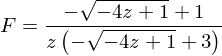

In [3]:
#definisco F
expression_F=(1-sqrt(1-4*z))/(z*(3-sqrt(1-4*z)))
eq_F=define(F, expression_F)
eq_F

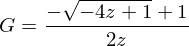

In [4]:
#definisco C
expression_C=(1-sqrt(1-4*z))/(2*z)
eq_C=define(G, expression_C)
eq_C

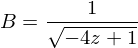

In [5]:
#definisco B
expression_B=1/sqrt(1-4*z)
eq_B=define(B, expression_B)
eq_B

Si verifica quindi (1): $\frac{B}{C}=\frac{B+1}{2}$

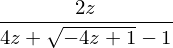

In [6]:
eq_left=eq_B.rhs/eq_C.rhs
simplify(eq_left)

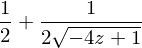

In [7]:
eq_right=(eq_B.rhs+1)/2
simplify(eq_right)

In [8]:
simplify(eq_left-eq_right)

Si verifica quindi (2): $C=\frac{F}{1-zF}$

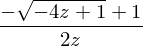

In [9]:
eq_right=(eq_F.rhs)/(1-(z*eq_F.rhs))
simplify(eq_right)

In [10]:
simplify(eq_right-(eq_C.rhs))

Si verifica quindi (3): $C^2=\frac{F}{1-2zF}$

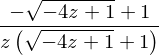

In [11]:
#calcolo di C2
eq_right=simplify(eq_F.rhs/(1-(2*z*eq_F.rhs)))
f=Lambda([z],eq_right)
eq_right

In [12]:
g=Lambda([z],eq_C.rhs)
series1=series(g(z), z, n=20)
series2=series1*series1
series2=Lambda([z], series2)
series2=series(series2(z), z, n=20)
series2

In [13]:
series(f(z), z, n=20)

Si procede ora con la verifica del seguente teorema:

### ***Teorema 2.1***  
Sia $F$ la funzione generatrice dei *Fine numbers*. Allora vale la seguente identità:  
$$(z^2+2z)F^2-(2z+1)F+1=0$$

In [14]:
expr=(((pow(z,2)+2*z)*pow(F,2)-((2*z+1)*F)+1))
expr

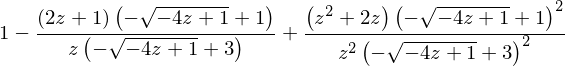

In [15]:
T=expr.subs({F:eq_F.rhs})
T

In [16]:
simplify(T)

## Conteggio dei cammini 2-Motzkin

Si procede con il verificare che il numero di cammini 2-Motzkin è uguale a $$C^2=\frac{1}{n+1}\binom{2n+2}{n}$$

Quindi si determinano tutte le sequenze di lunghezza n, composte da quattro elementi, che corrispondono alle quattro diverse tipologie di passi che possono essere presenti in un cammino 2-Motzkin. Successivamente si eliminano le sequenze che non rappresentano un cammino 2-Motzkin e si verifica che il numero di cammini ottenuti è uguale a $C^2$.

Nell'implementazione si identifica ogni possibile passo con un numero intero positivo: 0 movimento verso l'alto a destra, 1 movimento in orizzontale rosso, 2 movimento orizzontale verde, 3 movimento verso il basso a destra. 

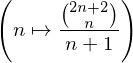

In [17]:
#definisco C2
C2=Lambda([n], 1/(n+1)*binomial((2*n+2),n))
C2

In [18]:
pow(4,5)

In [19]:
C2(3)

In [20]:
#crea tutte le possibili sequenze di lunghezza N composte da solo n elementi

def createAllSequenceList(N, n):
    result=[]
    x=[0 for i in range(N)] #inizia costruendo la sequenza nulla
    result.append(x.copy())

    j=N-1
    k=N-1
    while k>=0:
        if x[j]+1==n: #l'elemento della sequenza è massimo
            k=j
            while x[k]+1==n and k>=0: #cerco il primo elenmento non massimo
                k=k-1
            if k>=0:
                x[k]=x[k]+1
                j=N-1
                for i in range(k+1, N): #metto a zero tutti gli elementi a destra di quello implementato
                    x[i] = 0
        else: #l'elemento della sequenza non è il massimo: posso incrementare
            x[j]=x[j]+1
        result.append(x.copy())#aggiungo la sequenza corrente in coda alla lista
    result.pop()
    return result

In [21]:
myList=createAllSequenceList(5,4)
myList
len(myList)

In [22]:
#Data la lista delle sequenze di dimensione N con numeri fra 0 e 3. Restituisco le sequenze che rappresentano i cammini
#2-Motzkin di lunghezza N

def find2MontzkinPath(N, L):
    temp=L.copy()
    for k in range(len(temp)):
        s=temp[k]       #considero la sequenza k-esima
        stack=[]        
        for i in range(N):
            if s[i]==0:
                stack.append(0)     #uso una pila per ricordami che ho fatto un passo verso l'alto 
            if s[i]==3:
                if len(stack)!=0:
                    stack.remove(0)
                else:
                    temp[k]=0     #le sequenze scartate vengono eliminate ponendo a zero la cella della lista
        if len(stack)>0:    #mi assicuro di essere sull'asse delle x
            temp[k] = 0

    result=[]
    for i in range(len(temp)):   #creo una lista con le sequenze che rappresentano i cammini 2-Motzkin: ignoro gli 0 
        if temp[i]!=0:
            result.append(temp[i])
    return result



In [23]:
Motzkin2PathInMyList=find2MontzkinPath(5, myList)
len(Motzkin2PathInMyList)

In [24]:
C2(5)

Nel caso precedente abbiamo verificato la formula usando cammini formati da 5 passi, lo si può anche verificare per n passi generici. Con la function successiva lo si verifica per tutti gli n da 1 a 10.

In [25]:
#Dimostro che per tutti i cammini 2-Motzkin che terminano in (0,n) di lunghezza n vale C^2

def provaTutte(limit):
    r=[]
    for i in range(1, limit):
        L=createAllSequenceList(i, 4);
        result=find2MontzkinPath(i, L);
        r.append([len(result), C2(i)])
    return r
    

In [26]:
r=provaTutte(10)
print(r.__str__())

[[2, 2], [5, 5], [14, 14], [42, 42], [132, 132], [429, 429], [1430, 1430], [4862, 4862], [16796, 16796]]


## Conteggio dei cammini 2-Motzkin Fine

Si procede quindi con la generazione e il conteggio dei 2-Motzkin Fine paths, ossia dei cammini 2-Motzkin senza level steps ad altezza 0, utilizzando la seguente function che prende in input una lista di cammini 2-Motzkin e il numero di passi che li compongono.

In [27]:
def find2MontzkinFinePath(stepNumber, list):
    listCopy=list.copy()
    for k in range(len(listCopy)):
    	height=0;
    	s=listCopy[k]
    	stack=[]
    	for i in range(stepNumber):
    		if s[i]==0:
    			height=height+1
    		if s[i]==3:
    			height=height-1
    		else:
    			if (height==0):
    				listCopy[k]=0
    				break;
    result=[]
    for i in range(len(listCopy)):
        if listCopy[i]!=0:
            result.append(listCopy[i])

    return result

In [28]:
Motzkin2FinePathInMyList=find2MontzkinFinePath(5, Motzkin2PathInMyList)
len(Motzkin2FinePathInMyList)

Si verifica quindi la seguente approssimazione riportata nell'articolo:

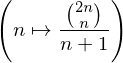

In [29]:
#definisco F
F=Lambda([n], 1/(n+1)*binomial(2*n,n))
F

In [30]:
4/9*F(5)

Successivamente si è cercato anche di verificarne il numero esatto utilizzando due metodi presentati in: http://oeis.org/A000957.  
Il *primo* consiste nell'applicazione della seguente procedura:

In [31]:
def preciseResult(n):
    n=n+1  #i numeri di Fine sono spostati di una posizione verso destra
    result=0
    if n==0:
        result=0
    else:
        for k in range(0,n):
            result=result+((-1)**(n+k-1)*binomial(n+k-1,n-1)*(n-k))/n;
    return result

In [32]:
preciseResult(5)

Il *secondo metodo* invece consiste nell'estrarre l'n-esimo coefficiente della funzione generatrice dei numeri Fine.



In [32]:
fn= Lambda([x], (1/x)*((1-sqrt(1-4*x))/(3-sqrt(1-4*x))))
t=series(fn(x), x, n=10)
t

In [55]:
coeffs=t.coeff(x**5)   #restituisce il coefficiente di grado 5
coeffs

Possiamo quindi vedere che il quinto coefficiente è proprio 18.

In [46]:
#Dimostro che per tutti i cammini 2-Motzkin fine che terminano in (0,n) di lunghezza n vale preciseResult

def provaTutteFinePrimoMetodo(limit):
    r=[]
    for i in range(1, limit):
        L=createAllSequenceList(i, 4);
        mpath=find2MontzkinPath(i, L);
        smpath=find2MontzkinFinePath (i, mpath)
        r.append([len(smpath), preciseResult(i)])
    return r
    

In [47]:
r=provaTutteFinePrimoMetodo(10)
print(r.__str__())

[[0, 0], [1, 1], [2, 2], [6, 6], [18, 18], [57, 57], [186, 186], [622, 622], [2120, 2120]]


In [44]:
#Dimostro che per tutti i cammini 2-Motzkin fine che terminano in (0,n) di lunghezza n è il coeff n-esimo
#della corrispondente funzione generatrice

def provaTutteFineSecondoMetodo(limit):
    r=[]
    fn= Lambda([x], (1/x)*((1-sqrt(1-4*x))/(3-sqrt(1-4*x))))
    t=series(fn(x), x, n=limit+1)
    for i in range(1, limit):
        L=createAllSequenceList(i, 4);
        mpath=find2MontzkinPath(i, L);
        smpath=find2MontzkinFinePath(i, mpath)
        coeffs=t.coeff(x**i)     
        r.append([len(smpath), coeffs])
    return r

In [45]:
r=provaTutteFineSecondoMetodo(10)
print(r.__str__())

[[0, 0], [1, 1], [2, 2], [6, 6], [18, 18], [57, 57], [186, 186], [622, 622], [2120, 2120]]


## Generalizzazione: ***b***-Montzkin numbers

In [ ]:
## Generalizzazione: ***b***-Montzkin numbers

## Conteggio passi orizzontali cammini 2-Montzkin

Usando le Figure 1 e 2 dell'articolo come guida. Si osserva che il numero totale di passi orizzontali ad altezza 0 di tutti i cammini 2-Motzkin di lunghezza $n$  è dato dalla seguente espressione:
$$L_0=[z^n]2zC^4=\frac{4n}{(n+1)(n+3)}\binom{2n+2}{n}$$

Il numero totale di passi orizzontali ad altezza 1 di tutti cammini 2-Montzkin di lunghezza $n$ è dato dalla seguente espressione:
$$L_1=[z^n]2z^3C^8=\frac{8}{n+1}\binom{2n+2}{n-3}$$

Il numero totale di passi orizzontali ad altezza generica $k$ di tutti cammini 2-Montzkin di lunghezza $n$ è dato dalla seguente espressione:
$$L_k=[z^n]2z^{2k+1}C^{4k+4}=\sum_{k\geq1}2\binom{2n}{n-1}z^n$$

Dimostriamo sperimentalmente le precedenti identità.

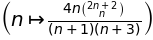

In [36]:
#definisco L0
L0=Lambda([n], 4*n/((n+1)*(n+3))*binomial(2*n+2,n))
L0

In [56]:
#definisco L1
L1=Lambda([n], 8/(n+1)*binomial(2*n+2,n-3))
L1

In [38]:
#definisco Lk
Lk=Lambda([n], 2*binomial(2*n, n-1))
Lk

In [39]:
from math import ceil

In [40]:
#Determina per una sequenza 2-Motzkin di lunghezza N il numero di passi orizzontali a ciascun livello. Restituisce un array in cui in ogni cella i
#viene riportato il numero di passi orizzontali a livello i.
def numberOfLevelStepsSequence(S):
    N=len(S)
    r=[]
    n=ceil(N/2)
    for i in range(n):
        r.append(0)

    level=0
    for step in S:
        if step==0:
            level=level+1
        elif step==3:
            level=level-1
        else:
            if step==1 or step==2:
                r[level]=r[level]+1

    return r


In [41]:
#Calcolo il numero totale di passi orizzontali per ogni sequenza 2-Motzkin di lunghezza N. Restituisce un array contenente in ogni cella i
#il totale dei passi orizzontali al livello i.
def numberOfLevelSteps(N, L):
    numberOfSteps = []
    for i in range(len(L)):
        r = numberOfLevelStepsSequence(L[i]) #calcolo i conteggi per la i-esima sequenza
        r=r.copy()
        if i==0:
            numberOfSteps=r #inizializzo numberOfSteps con i conteggi della prima sequenza 
        else:
            for j in range(len(r)):
                numberOfSteps[j]=numberOfSteps[j]+r[j] #aggiorno i conteggi considerando anche quelli per la nuova sequenza

    return numberOfSteps

In [42]:
#Uso questa procedura per dimostrare che valgono le identità
def provaTutte(N, level):
    numberOfSteps=0
    L=createAllSequenceList(N, 4)
    L=find2MontzkinPath(N, L)
    r=numberOfLevelSteps(N,L)
    if level==-1: #calcolo il numero totale di passi orizzontali
        sum=0
        for c in r: #sommo tutti i conteggi dei passi di tutti i livelli
            sum=sum+c
        numberOfSteps=sum
    elif level==0: #prendo il numero di passi al livello 0
        numberOfSteps=r[level]
    else: #prendo il numero di passi al livello 1
        if len(r)==1: #il numero di passi al livello 1 si trova nella posizione 0 se il vettore ha dimensione 1;
            numberOfSteps=0  
        else: 
            numberOfSteps=r[level] 
    return numberOfSteps
            

In [43]:
#Livello 0
[[provaTutte(i, 0), L0(i)] for i in range(1,10)]

In [57]:
#livello 1
[[provaTutte(i, 1), L1(i)] for i in range(1,10)]

In [45]:
#livello generico k
[[provaTutte(i, -1), Lk(i)] for i in range(1,10)]